In [149]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [151]:
# File to Load 
CleanMovieData = "output/CleanMovieData.csv"

CleanedDF = pd.read_csv(CleanMovieData)
CleanedDF.count()
#MovieCredits = "tmdb_5000_credits.csv"
#MovieData = "tmdb_5000_movies.csv"

#CreditsDF = pd.read_csv(MovieCredits)
#MoviesDF = pd.read_csv(MovieData)

#CleanCreditsDF = CreditsDF[["movie_id","cast"]]
#CleanCreditsDF = CleanCreditsDF.rename(columns = {"movie_id":"id","cast":"cast"})
#CleanMoviesDF = MoviesDF[["budget","genres","id","original_language","popularity","release_date",
#                         "revenue","runtime","title","vote_average","vote_count"]]
#CleanedDF = pd.merge(CleanMoviesDF,CleanCreditsDF,on="id")

budget               4800
genres               4800
id                   4800
original_language    4800
popularity           4800
release_date         4800
revenue              4800
runtime              4800
title                4800
vote_average         4800
vote_count           4800
cast                 4800
Action               4800
Adventure            4800
Animation            4800
Comedy               4800
Crime                4800
Documentary          4800
Drama                4800
Family               4800
Fantasy              4800
Foreign              4800
History              4800
Horror               4800
Music                4800
Mystery              4800
Romance              4800
Science Fiction      4800
Thriller             4800
TV Movie             4800
War                  4800
Western              4800
Year                 4800
Decade               4800
dtype: int64

In [152]:
#define genre list
genres = ['Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Family','Fantasy','Foreign',
          'History','Horror','Music','Mystery','Romance','Science Fiction','Thriller','TV Movie','War','Western']
#create a new column for each genre containing a boolean 
for genre in genres:
    CleanedDF[genre] = CleanedDF['genres'].str.contains(genre)
#show df   
CleanedDF.head()

,budget,genres,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,...,Music,Mystery,Romance,Science Fiction,Thriller,TV Movie,War,Western,Year,Decade
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,...,False,False,False,True,False,False,False,False,2009,2000's
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,...,False,False,False,False,False,False,False,False,2007,2000's
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,...,False,False,False,False,False,False,False,False,2015,2010's
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,...,False,False,False,False,True,False,False,False,2012,2010's
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,...,False,False,False,True,False,False,False,False,2012,2010's


In [153]:
#isolate release year, convert to int, and cut into decades
CleanedDF['Year'] = CleanedDF['release_date'].str.split('-').str[0]
CleanedDF['Year'] = pd.to_numeric(CleanedDF['Year'], errors='coerce')
decade_bins = [0,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020]
decade_labels = ["1910's","1920's","1930's","1940's","1950's","1960's","1970's","1980's","1990's","2000's","2010's"]
CleanedDF['Decade'] = pd.cut(CleanedDF['Year'], decade_bins, labels=decade_labels)

#show df
CleanedDF.head()

,budget,genres,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,...,Music,Mystery,Romance,Science Fiction,Thriller,TV Movie,War,Western,Year,Decade
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,...,False,False,False,True,False,False,False,False,2009,2000's
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,...,False,False,False,False,False,False,False,False,2007,2000's
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,...,False,False,False,False,False,False,False,False,2015,2010's
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,...,False,False,False,False,True,False,False,False,2012,2010's
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,...,False,False,False,True,False,False,False,False,2012,2010's


In [154]:
# Get GenreCounts
# A is empty list to get value counts of Genres
A = []
for genre in genres:
    A.append(CleanedDF[genre].value_counts().unique().tolist())
A 

# Dividing A into flat_list to get the False and True values separated into list
flat_list = []
for sublist in A:
    for item in sublist:
        flat_list.append(item)
flat_list
length = len(flat_list)
flat_list

# Creating Flat_list2 to get only the True values which are odd indexes
flat_list2 = []
flatlistindex = 0
for item in flat_list:
    if(flatlistindex)%2!=0:
        flat_list2.append(item)
    flatlistindex += 1
flat_list2

# Creating GenreCountsDF from the data
GenreCountsDF = pd.DataFrame(
{
    'Genre':genres,
    "Counts":flat_list2
}
)

# Display sorted list of Genres
GenreCountsDF.sort_values(by = ['Counts'], ascending = False)


,Genre,Counts
6,Drama,2296
3,Comedy,1722
16,Thriller,1274
0,Action,1154
14,Romance,894
1,Adventure,790
4,Crime,696
15,Science Fiction,535
11,Horror,519
7,Family,513


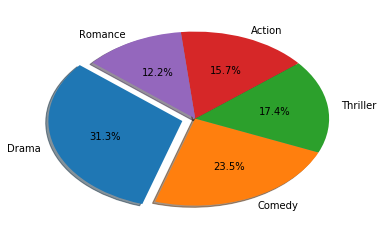

In [155]:
# Plot Genre counts as percentage of movies in sample of 5000 movies
SortedGenreCountsDF = GenreCountsDF.sort_values(by=['Counts'],ascending=False)
#plt.pie(flat_list2,labels= genres, autopct = "%1.1f%%", shadow = True, startangle = 140)
Top5GenreCountsDF = SortedGenreCountsDF.reset_index()
Top5GenresDF = Top5GenreCountsDF.loc[0:4,]
Top5Genres = Top5GenresDF['Genre']
Top5GenreCounts = Top5GenresDF['Counts']

Top5GenresDF
# Drama, Comedy, Thriller, Action, Romance
explode = (0.1,0,0,0,0)

# Plot the top 5 Genres as a Pie Chart
plt.pie(Top5GenreCounts,labels= Top5Genres, autopct = "%1.1f%%", explode = explode, shadow = True, startangle = 140)
plt.savefig("Output/Top5GenrePie.png")

In [156]:
# Group by Decade
DecadeGroup = CleanedDF[['Decade','id']].groupby('Decade')

# Count movies in each decade
MoviesPerDecade = DecadeGroup.count()
MoviesPerDecade = MoviesPerDecade.reset_index()
MoviesPerDecade = MoviesPerDecade.rename(columns={"Decade":"Decade","id":"Movie Count"})
MoviesPerDecade



,Decade,Movie Count
0,1910's,1
1,1920's,5
2,1930's,19
3,1940's,21
4,1950's,29
5,1960's,80
6,1970's,119
7,1980's,285
8,1990's,915
9,2000's,2107


In [ ]:
# 